<a href="https://colab.research.google.com/github/sweaniket/Experiments/blob/main/Experiment-2/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data ...( California_Housing)
df_test = pd.read_csv("sample_data/california_housing_test.csv")
df_train = pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [2]:
train_data = df_train[["latitude","housing_median_age","total_rooms","total_bedrooms","households","median_income"]]
train_output = df_train[["median_house_value"]]
test_data = df_test[["latitude","housing_median_age","total_rooms","total_bedrooms","households","median_income"]]
test_output = df_test[["median_house_value"]]

In [3]:
class LinearRegression_OLS :
  def __init__(self):
    self.theta = None

  def fit(self , train_X,train_Y) :
    X=train_X.values
    Y=train_Y.values
    ones = np.ones((X.shape[0], 1))
    X_b = np.hstack([ones, X])
    self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

  def predict(self, test_X):
    ones = np.ones((test_X.shape[0], 1))
    X_b = np.hstack([ones, test_X])
    return X_b.dot(self.theta)


linear_OLS = LinearRegression_OLS()
linear_OLS.fit(train_data,train_output)
y_pred_OLS=linear_OLS.predict(test_data)
print(y_pred_OLS)

[[320051.67753727]
 [219036.07885662]
 [275955.55188805]
 ...
 [ 80928.28232807]
 [187671.36742248]
 [447527.31949152]]


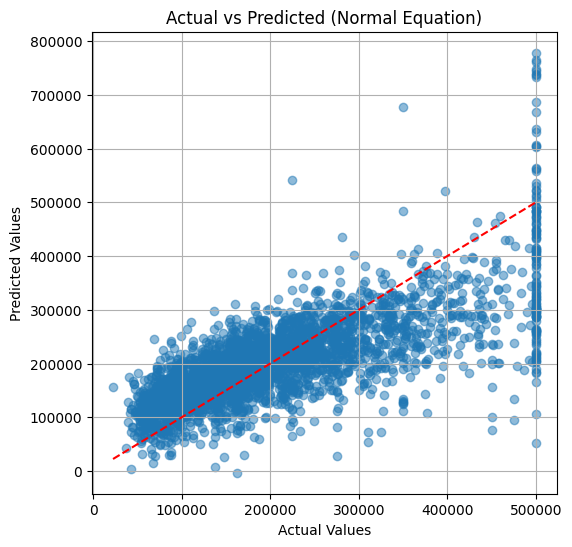

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(test_output, y_pred_OLS, alpha=0.5)
plt.plot([test_output.min(), test_output.max()], [test_output.min(), test_output.max()], 'r--')  # diagonal
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Normal Equation)")
plt.grid(True)
plt.show()

In [5]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000, batch_size=None, normalize=True, tol=None, random_state=None):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.normalize = normalize
        self.tol = tol
        self.random_state = random_state
        self.theta_ = None
        self.mu_ = None
        self.sigma_ = None
        self.losses_ = []

    @staticmethod
    def _to_numpy(X):
        return X.values if hasattr(X, "values") else np.asarray(X)

    def _prepare_X(self, X, fit_phase=False):
        X = self._to_numpy(X).astype(float)
        if fit_phase:
            if self.normalize:
                self.mu_ = X.mean(axis=0, keepdims=True)
                self.sigma_ = X.std(axis=0, keepdims=True)
                self.sigma_[self.sigma_ == 0.0] = 1.0
        if self.normalize:
            X = (X - self.mu_) / self.sigma_
        ones = np.ones((X.shape[0], 1), dtype=float)
        X_b = np.hstack([ones, X])
        return X_b

    def fit(self, X, y):
        rng = np.random.default_rng(self.random_state)
        X_b = self._prepare_X(X, fit_phase=True)
        y = self._to_numpy(y).reshape(-1, 1)
        n_samples, n_params = X_b.shape
        self.theta_ = np.zeros((n_params, 1))
        bsz = self.batch_size if self.batch_size is not None else n_samples
        last_loss = None
        for epoch in range(self.epochs):
            idx = rng.permutation(n_samples)
            X_b_shuf, y_shuf = X_b[idx], y[idx]
            for start in range(0, n_samples, bsz):
                end = start + bsz
                Xb, yb = X_b_shuf[start:end], y_shuf[start:end]
                m = Xb.shape[0]
                y_pred = Xb @ self.theta_
                grad = (Xb.T @ (y_pred - yb)) / m
                self.theta_ -= self.lr * grad
            full_pred = X_b @ self.theta_
            loss = 0.5 * np.mean((full_pred - y) ** 2)
            self.losses_.append(loss)
            if self.tol is not None and last_loss is not None:
                if abs(last_loss - loss) < self.tol:
                    break
            last_loss = loss
        return self

    def predict(self, X):
        X_b = self._prepare_X(X, fit_phase=False)
        return (X_b @ self.theta_).ravel()

    @property
    def coef_(self):
        return self.theta_[1:].ravel()

    @property
    def intercept_(self):
        return float(self.theta_[0])

# Train and predict
linear_GD = LinearRegressionGD(lr=0.05, epochs=1500, random_state=42)
linear_GD.fit(train_data,train_output)
y_pred_GD=linear_GD.predict(test_data)
print(y_pred_GD)

[319477.92209416 218674.87209915 277126.87932437 ...  82448.58060764
 187732.59594752 446406.53532366]


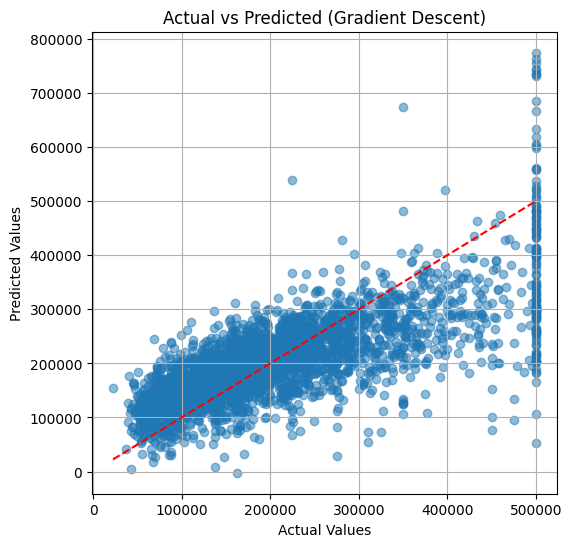

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(test_output, y_pred_GD, alpha=0.5)
plt.plot([test_output.min(), test_output.max()], [test_output.min(), test_output.max()], 'r--')  # diagonal
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Gradient Descent)")
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

# Train and predict
model = LinearRegression()
model.fit(train_data, train_output)
y_pred_SK = model.predict(test_data)
print(y_pred_SK)

[[320051.67753728]
 [219036.07885661]
 [275955.55188804]
 ...
 [ 80928.28232807]
 [187671.36742247]
 [447527.31949152]]


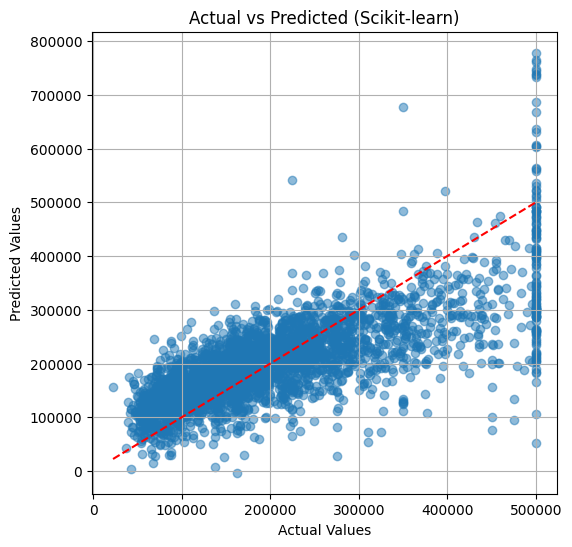

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(test_output, y_pred_SK, alpha=0.5)
plt.plot([test_output.min(), test_output.max()], [test_output.min(), test_output.max()], 'r--')  # diagonal
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Scikit-learn)")
plt.grid(True)
plt.show()

In [9]:
## Comparison among NORMAL, BATCH GRADIENT AND SK-LEARN Method.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions from all 3 methods (ensure they are 1D arrays)
y_pred_normal = y_pred_OLS.ravel()
y_pred_gd = y_pred_GD.ravel()
y_pred_sklearn = y_pred_SK.ravel()

y_true = test_output.values.ravel()

# Function to compute all metrics
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {name} Results ---")
    print(f"  MSE  : {mse:,.2f}")
    print(f"  RMSE : {rmse:,.2f}")
    print(f"  MAE  : {mae:,.2f}")
    print(f"  R²   : {r2:.4f}")

# Compare all three
evaluate_model(y_true, y_pred_normal, "Normal Equation")
evaluate_model(y_true, y_pred_gd, "Gradient Descent")
evaluate_model(y_true, y_pred_sklearn, "Scikit-learn")


--- Normal Equation Results ---
  MSE  : 6,009,185,031.70
  RMSE : 77,518.93
  MAE  : 56,775.43
  R²   : 0.5302

--- Gradient Descent Results ---
  MSE  : 6,018,187,873.78
  RMSE : 77,576.98
  MAE  : 56,843.81
  R²   : 0.5295

--- Scikit-learn Results ---
  MSE  : 6,009,185,031.70
  RMSE : 77,518.93
  MAE  : 56,775.43
  R²   : 0.5302
